<img src="img/1.png" width=700 align="left">

Estimador de momentos:

Uso el primer momento, pues si $b > 0$ con $\mathcal{U}[0,b]$ \, 

o con $b < 0$ para $\mathcal{U}[b,0]$, la esperanza será distinta de cero.

\begin{equation*}
\hat{b}_{mom} = E [X_i] = \int_{0}^{b} x_i * \frac{1}{b} * dx = latex es muerte
\end{equation*}












In [25]:
# Función estimadora de primeros momentos
bmom1 = function(muestra){
    2*mean(muestra)
}

# Función estimadora de segundos momentos (para comparar)
bmom2 = function(muestra){
    n <- length(muestra)
    sqrt(3 * mean(muestra^2))
}

In [26]:
# Estimador de maxima verosimilitud
bmv = function(muestra){
    max(muestra)
}

In [27]:
b <- 1
n <- 15
muestra <- runif(n, min=0, max=b)

#acumuladores
bmom1_acum <- 0
bmom2_acum <- 0
bmv_acum   <- 0
# error acumulado en k experimentos
k <- 1000
for(i in 1:k){
    bmom1_acum <- bmom1_acum + abs(bmom1(muestra)-b)
    bmom2_acum <- bmom2_acum + abs(bmom2(muestra)-b)
    bmv_acum   <- bmv_acum   + abs(bmv(muestra)-b)
}
bmom1_acum
bmom2_acum
bmv_acum 

[1] 299,4139

[1] 233,5418

[1] 87,22254

<img src="img/2.png" width=700 align="left">

In [28]:
bmed = function(muestra){
    2*median(muestra)
}

<img src="img/3.png" width=700 align="left">

In [29]:
b <- 1
n <- 15
muestra <- runif(n, min=0, max=b)

In [30]:
b - bmom1(muestra)
b - bmom2(muestra)
b - bmv(muestra)
b - bmed(muestra)

[1] -0,006978148

[1] 0,005748769

[1] 0,01164464

[1] 0,06034468

<img src="img/4.png" width=700 align="left">

In [31]:
experimento = function(){
    # a)
    b <- 1
    n <- 15
    muestra <- runif(n, min=0, max=b)
    # b)
    b_mom1 <- bmom1(muestra)
    b_mom2 <- bmom2(muestra)
    b_mv  <- bmv(muestra)
    b_med <- bmed(muestra)
    #devuelvo un vector de estimadores
    c(b_mom1, b_mom2, b_mv, b_med)
}

In [32]:
# c)
nrep <- 10
estimadores <- array(dim=c(nrep,4), dimnames=list(1:nrep, c("b_mom1", "b_mom2", "b_mv", "b_med")))
for(i in 1:nrep){
    estimadores[i,] <- array(experimento())
}

In [33]:
estimadores[1:3,]

b_mom1,b_mom2,b_mv,b_med
"0,8333244","0,928052","0,9647842","0,7099755"
"1,1187763","1,109778","0,9774749","1,3728185"
"1,1569889","1,069884","0,9003352","1,2357676"


#### Media uniforme: E[X] = (a+b)/2

In [34]:
# d)
medias_muestrales <- estimadores/2 # + 0/2, pues a = 0, y b = estimadores

In [35]:
sesgos <- medias_muestrales - b

sesgo_aprox <- apply(sesgos, MARGIN=2, FUN=median)

In [36]:
sesgo_aprox

b_mom1     b_mom2       b_mv      b_med 
-0,4744857 -0,4818108 -0,5173562 -0,4564195

#### Varianza muestral: 
Uso estimador insesgado: $S^2 =  \frac{\sum (X_i - \hat{\mu} )^2}{n-1}$

In [37]:
# e)
varianzas_muestrales <- ((medias_muestrales-b/2)^2)/(n-1)

In [38]:
varianza_aprox <- apply(varianzas_muestrales, MARGIN=2, FUN=mean)

In [39]:
varianza_aprox

b_mom1       b_mom2         b_mv        b_med 
2,104921e-04 8,876256e-05 1,253761e-04 8,438913e-04

In [40]:
# f) Aproximación del Error Cuadratico Medio (ECM)
ECM <- varianza_aprox + sesgo_aprox^2
ECM

b_mom1    b_mom2      b_mv     b_med 
0,2253472 0,2322305 0,2677829 0,2091627

<img src="img/5.png" width=700 align="left">

In [199]:
# Funciones simuladoras:
# Devuelven sesgo y varianza aproximados
# promediando 1000 experimentos
# con Estimador de Maxima Verosimilitud
simulacion_mv = function(b, n){
    nE <- 1000
    sesgo <- vector(length=nE)
    varianza <- vector(length=nE)
    muestras <- matrix(nrow=nE, ncol=1)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        muestras[i] <- mean(muestra)
        b_est <- bmv(muestra)
        ## PREGUNTAR SOBRE SESGO Y VARIANZA
        sesgo[i] <- b_est - b
        varianza[i] <- 1/(n-1) * sum(muestra - b_est/2)^2
    }
    # Para chequear Teorema Central del Limite, descomentar:
    #hist(muestras)
    return(list("sesgo"=mean(sesgo), "var"=mean(varianza)))
}

# con Estimador de 1er Momento
simulacion_mom = function(b, n){
    nE <- 1000
    sesgo <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        b_est <- bmom1(muestra)
        sesgo[i] <- b_est - b
        varianza[i] <- 1/(n-1) * sum(muestra - b_est/2)^2
    }
    return(list("sesgo"=mean(sesgo), "var"=mean(varianza)))
}

# Agrego también simulación de 2do momento
simulacion_mom2 = function(b, n){
    nE <- 1000
    sesgo <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        b_est <- bmom1(muestra)
        sesgo[i] <- b_est - b
        varianza[i] <- 1/(n-1) * sum(muestra - b_est/2)^2
        }
    return(list("sesgo"=mean(sesgo), "var"=mean(varianza)))
}

# con Mediana de la muestra
simulacion_med = function(b, n){
    nE <- 1000
    sesgo <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        b_est <- bmed(muestra)
        sesgo[i] <- b_est - b
        varianza[i] <- 1/(n-1) * sum(muestra - b_est/2)^2
        }
    return(list("sesgo"=mean(sesgo), "var"=mean(varianza)))
}

<img src="img/6.png" width=700 align="left">

In [200]:
# Calculo sesgos, varianzas y ECM para 20 valores
# distintos de b entre 0 y 2 (no inclusives)
nB <- 20
b_values <- seq(0.1, 1.9, by=1.8/(nB-1))
# nB filas, 3 columnas: (bias, var, ECM)
results_mv   <- matrix(nrow=nB, ncol=3)
results_mom  <- matrix(nrow=nB, ncol=3)
results_mom2 <- matrix(nrow=nB, ncol=3)
results_med  <- matrix(nrow=nB, ncol=3)

for (i in 1:nB){
    b <- b_values[i]
    results_mv[i,1:2]   <- unlist(simulacion_mv(b, 15))
    results_mom[i,1:2]  <- unlist(simulacion_mom(b, 15))
    results_mom2[i,1:2] <- unlist(simulacion_mom2(b, 15))
    results_med[i,1:2]  <- unlist(simulacion_med(b, 15))
    # ECM = Var^2 + Sesgo^2
    results_mv[i,3] <- results_mv[i,1]^2+results_mv[i,2]^2
    results_mom[i,3] <- results_mom[i,1]^2+results_mom[i,2]^2
    results_mom2[i,3] <- results_mom2[i,1]^2+results_mom2[i,2]^2
    results_med[i,3] <- results_med[i,1]^2+results_med[i,2]^2
}

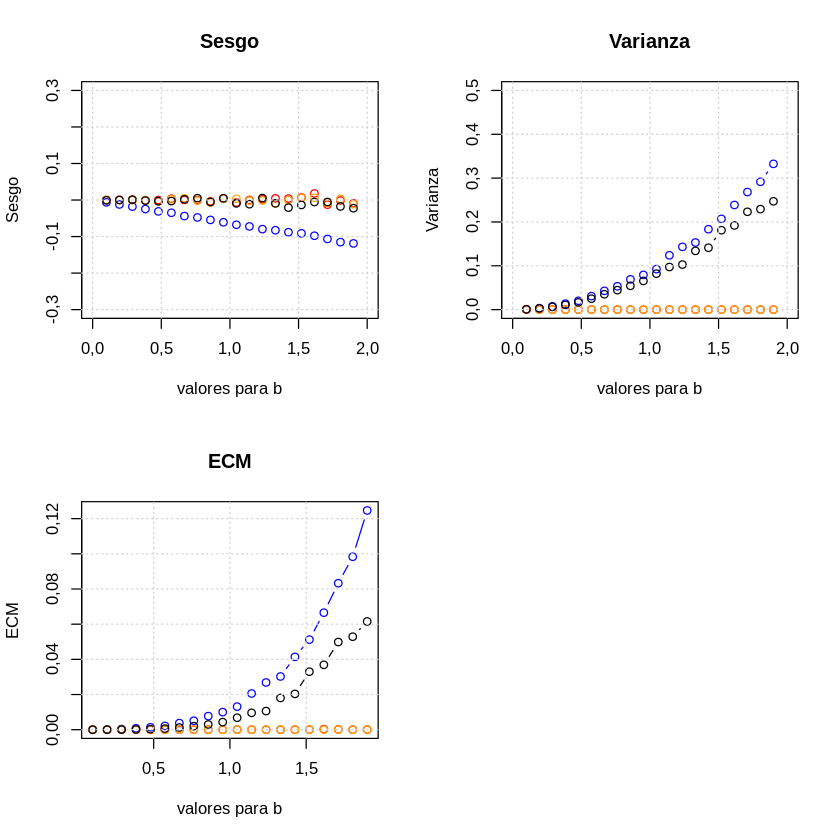

In [201]:
par(mfrow=c(2,2))
# Sesgos
plot(b_values, results_mv[,1], ylim=c(-0.3,0.3), xlim=c(0,2),
     col="blue", main="Sesgo", xlab="valores para b", ylab="Sesgo", type="b")
points(b_values, results_mom[,1], col="red", type="b")
points(b_values, results_mom2[,1], col="orange", type="b")
points(b_values, results_med[,1], col="black", type="b")
grid()
# Varianzas
plot(b_values, results_mv[,2], ylim=c(0,0.5), xlim=c(0,2),
     col="blue", main="Varianza", xlab="valores para b", ylab="Varianza", type="b")
points(b_values, results_mom[,2], col="red", type="b")
points(b_values, results_mom2[,2], col="orange", type="b")
points(b_values, results_med[,2], col="black", type="b")
grid()
# ECM = Var^2 + Sesgo^2
plot(b_values, results_mv[,3], col="blue", main="ECM", xlab="valores para b", ylab="ECM", type="b")
points(b_values, results_mom[,3], col="red", type="b")
points(b_values, results_mom2[,3], col="orange", type="b")
points(b_values, results_med[,3], col="black", type="b")
grid()

### Observaciones:

* 

### Decisiones:

* Los dos estimadores de momento parecen ser los más estables, mientras que EMV y EMed muestran ciertos picos para uno o varios 'b' cerca de 1.5.


<img src="img/7.png" width=700 align="left">

In [202]:
# Calculo sesgos, varianzas para 20 valores
# distintos de b entre 0 y 2 (no inclusives)
n_values <- c(15, 30, 60, 120, 240)
nN <- length(n_values)
# nN filas, 2 columnas: (n, ECM)
results_mv   <- matrix(nrow=nN, ncol=2)
results_mom  <- matrix(nrow=nN, ncol=2)
results_mom2 <- matrix(nrow=nN, ncol=2)
results_med  <- matrix(nrow=nN, ncol=2)

for (i in 1:nN){
    n <- n_values[i]
    result_mv   <- unlist(simulacion_mv(1, n))
    result_mom  <- unlist(simulacion_mom(1, n))
    result_mom2 <- unlist(simulacion_mom2(1, n))
    result_med  <- unlist(simulacion_med(1, n))
    # ECM = Var^2 + Sesgo^2   < --------------------------------------- revisar! es Var^2?
    results_mv[i,] <- c(n, result_mv[1]^2+result_mv[2])
    results_mom[i,] <- c(n,result_mom[1]^2+result_mom[2])
    results_mom2[i,] <- c(n, result_mom2[1]^2+result_mom2[2])
    results_med[i,] <- c(n, result_med[1]^2+result_med[2])
}

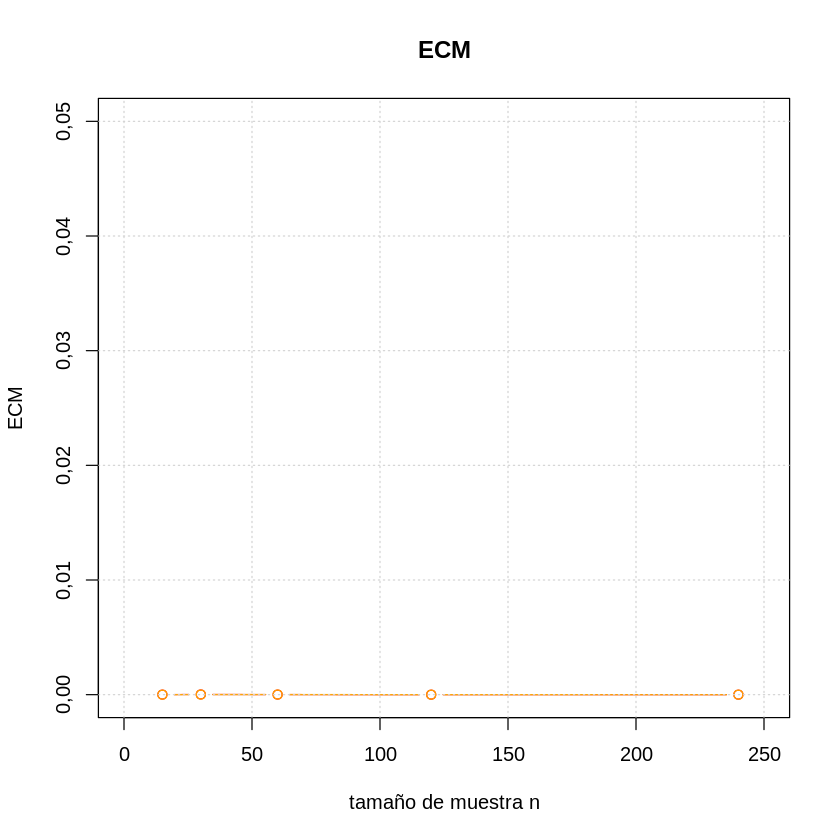

In [203]:
# ECM = Var^2 + Sesgo^2
plot(results_mv, col="blue", main="ECM", xlab="tamaño de muestra n", ylab="ECM", type="b", ylim=c(0,0.05), xlim=c(0,250))
points(results_mom, col="red", type="b")
points(results_mom2, col="orange", type="b")
points(results_med, col="black", type="b")
grid()

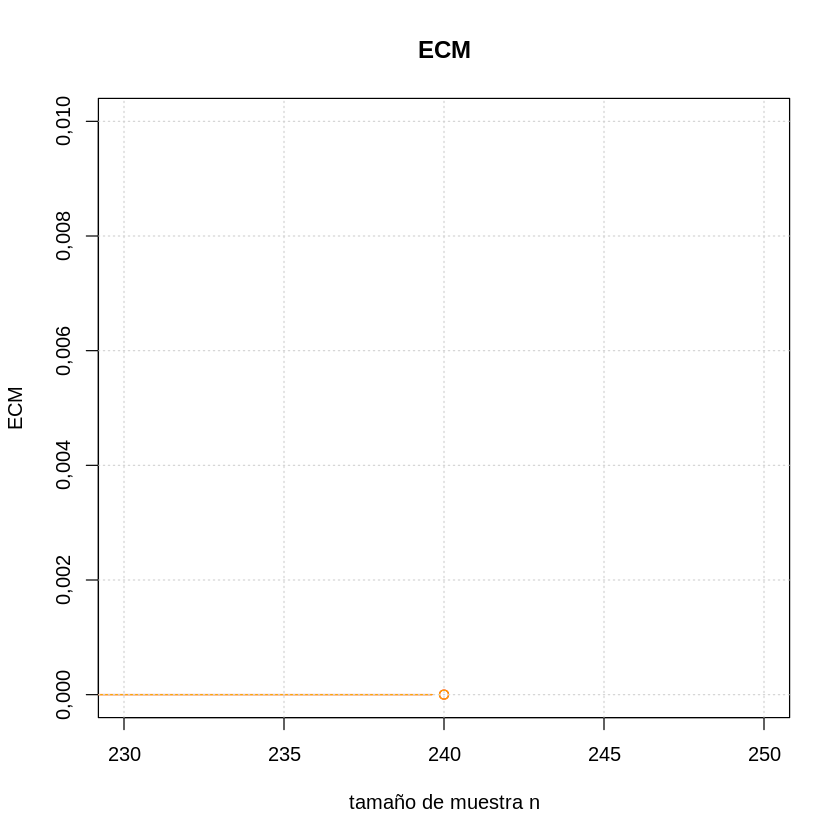

In [204]:
# Zoom en mayor n
# ECM = Var^2 + Sesgo^2
plot(results_mv, col="blue", main="ECM", xlab="tamaño de muestra n", ylab="ECM", type="b", ylim=c(0,0.01), xlim=c(230,250))
points(results_mom, col="red", type="b")
points(results_mom2, col="orange", type="b")
points(results_med, col="black", type="b")
grid()

### Observaciones:
* Tras repetir el experimento varias veces, es común ver a los estimadores de momentos converger en cero desde tamaños de muestra pequeños, mientras que el estimador de MV y Mediana parecen converger asintoticamente a un valor > 0

<img src="img/8.png" width=700 align="left">

In [205]:
X <- c(0.917, 0.247, 0.384, 0.530, 0.798,
       0.912, 0.096, 0.684, 0.394, 20.1,
       0.769, 0.137, 0.352, 0.332, 0.670)

In [206]:
b_mv <- bmv(X)
b_mom <- bmom1(X)
b_mom2 <- bmom2(X)
b_med <- bmed(X)

In [207]:
b_mv
b_mom
b_mom2
b_med

[1] 20,1

[1] 3,642933

[1] 9,041397

[1] 1,06

* Tanto revisando la data como gradicando un boxplot, se ve que el error es debido a un outlier de un valor 40 veces mayor al resto de la muestra.

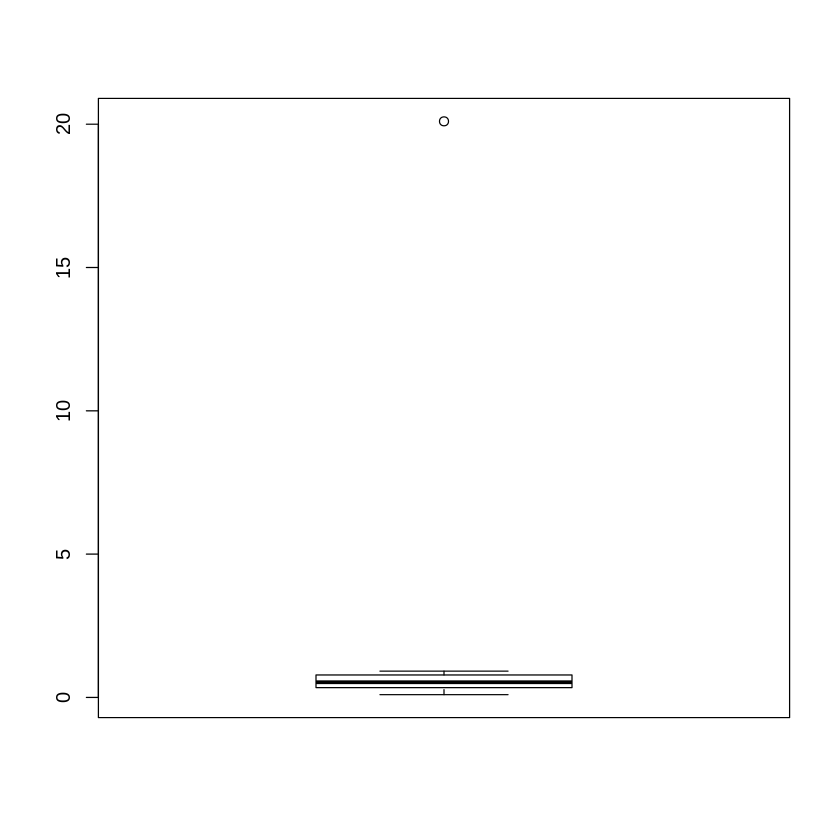

In [208]:
boxplot(X)

* Una vez comprobado que sea un outlier, podemos 'reparar' nuestra muestra eliminando el valor fuera de rango, y calcular los estimadores con el resto de la muestra.

In [209]:
X_fixed <- c(0.917, 0.247, 0.384, 0.530, 0.798,
       0.912, 0.096, 0.684, 0.394,
       0.769, 0.137, 0.352, 0.332, 0.670)

In [210]:
b_mv <- bmv(X_fixed)
b_mom <- bmom1(X_fixed)
b_mom2 <- bmom2(X_fixed)
b_med <- bmed(X_fixed)

In [211]:
b_mv
b_mom
b_mom2
b_med

[1] 0,917

[1] 1,031714

[1] 1,006153

[1] 0,924

<img src="img/9.png" width=700 align="left">

In [212]:
n <- 15
b <- 1
X <- runif(n, 0, b)

In [214]:
# Minicódigo a implementar en funciones simuladoras
X_cont <- X
for(i in 1:n){
    pC <- 0.005 # 1/200
    if(runif(1) < pC){
        X_cont[i] <- X_cont[i] * 100
    }
}

# De manera más eficiente (y bonita :)
pC <- 1/200
mask <- runif(n)
X_cont[mask<pC] <- X_cont[mask<pC] * 100

#### a) Proba de que la muestra esté contaminada:

Cada elemento tiene $p=\frac{1}{200}=0.005$ de ser contaminado, por lo que la probabilidad de que la muestra esté contaminada es de $\frac{n}{200}$, siendo $n$ la cantidad de elementos de la muestra.

Para nuestro caso de 15 elementos, la probabilidad de una muestra contaminada será de: $\frac{15}{200} = \frac{3}{40} = 0.075$ lo cual sigue pareciendo un valor pequeño.

Pero qué pasará si necesitamos tomar una gran cantidad de muestras de la misma fuente con posible contaminación?

#### b) Aproximaciones obtenidas:


In [215]:
# Funciones simuladoras CON CONTAMINACIÓN:
# Devuelven sesgo y varianza aproximados
# promediando 1000 experimentos
# con Estimador de Maxima Verosimilitud
simulacion_mv_cont = function(b, n){
    nE <- 1000
    sesgo <- vector(length=nE)
    varianza <- vector(length=nE)
    muestras <- matrix(nrow=nE, ncol=1)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        # Contaminación con proba pC
        pC <- 1/200
        mask <- runif(n)
        muestra[mask<pC] <- muestra[mask<pC] * 100
        # Fin contaminación
        muestras[i] <- mean(muestra)
        b_est <- bmv(muestra)
        ## PREGUNTAR SOBRE SESGO Y VARIANZA
        sesgo[i] <- b_est - b
        varianza[i] <- 1/(n-1) * sum(muestra - b_est/2)^2
    }
    # Para chequear Teorema Central del  Limite, descomentar:
    #hist(muestras)
    return(list("sesgo"=mean(sesgo), "var"=mean(varianza)))
}

# con Estimador de 1er Momento
simulacion_mom_cont = function(b, n){
    nE <- 1000
    sesgo <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        # Contaminación con proba pC
        pC <- 1/200
        mask <- runif(n)
        muestra[mask<pC] <- muestra[mask<pC] * 100
        # Fin contaminación
        b_est <- bmom1(muestra)
        sesgo[i] <- b_est - b
        varianza[i] <- 1/(n-1) * sum(muestra - b_est/2)^2
    }
    return(list("sesgo"=mean(sesgo), "var"=mean(varianza)))
}

# Agrego también simulación de 2do momento
simulacion_mom2_cont = function(b, n){
    nE <- 1000
    sesgo <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        # Contaminación con proba pC
        pC <- 1/200
        mask <- runif(n)
        muestra[mask<pC] <- muestra[mask<pC] * 100
        # Fin contaminación
        b_est <- bmom1(muestra)
        sesgo[i] <- b_est - b
        varianza[i] <- 1/(n-1) * sum(muestra - b_est/2)^2
        }
    return(list("sesgo"=mean(sesgo), "var"=mean(varianza)))
}

# con Mediana de la muestra
simulacion_med_cont = function(b, n){
    nE <- 1000
    sesgo <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        # Contaminación con proba pC
        pC <- 1/200
        mask <- runif(n)
        muestra[mask<pC] <- muestra[mask<pC] * 100
        # Fin contaminación
        b_est <- bmed(muestra)
        sesgo[i] <- b_est - b
        varianza[i] <- 1/(n-1) * sum(muestra - b_est/2)^2
        }
    return(list("sesgo"=mean(sesgo), "var"=mean(varianza)))
}

In [216]:
# Calculo sesgos, varianzas y ECM para 20 valores
# distintos de b entre 0 y 2 (no inclusives)
nB <- 20
b_values <- seq(0.1, 1.9, by=1.8/(nB-1))
# nB filas, 3 columnas: (bias, var, ECM)
results_mv   <- matrix(nrow=nB, ncol=3)
results_mom  <- matrix(nrow=nB, ncol=3)
results_mom2 <- matrix(nrow=nB, ncol=3)
results_med  <- matrix(nrow=nB, ncol=3)

for (i in 1:nB){
    b <- b_values[i]
    results_mv[i,1:2]   <- unlist(simulacion_mv_cont(b, 15))
    results_mom[i,1:2]  <- unlist(simulacion_mom_cont(b, 15))
    results_mom2[i,1:2] <- unlist(simulacion_mom2_cont(b, 15))
    results_med[i,1:2]  <- unlist(simulacion_med_cont(b, 15))
    # ECM = Var^2 + Sesgo^2
    results_mv[i,3] <- results_mv[i,1]^2+results_mv[i,2]
    results_mom[i,3] <- results_mom[i,1]^2+results_mom[i,2]
    results_mom2[i,3] <- results_mom2[i,1]^2+results_mom2[i,2]
    results_med[i,3] <- results_med[i,1]^2+results_med[i,2]
}

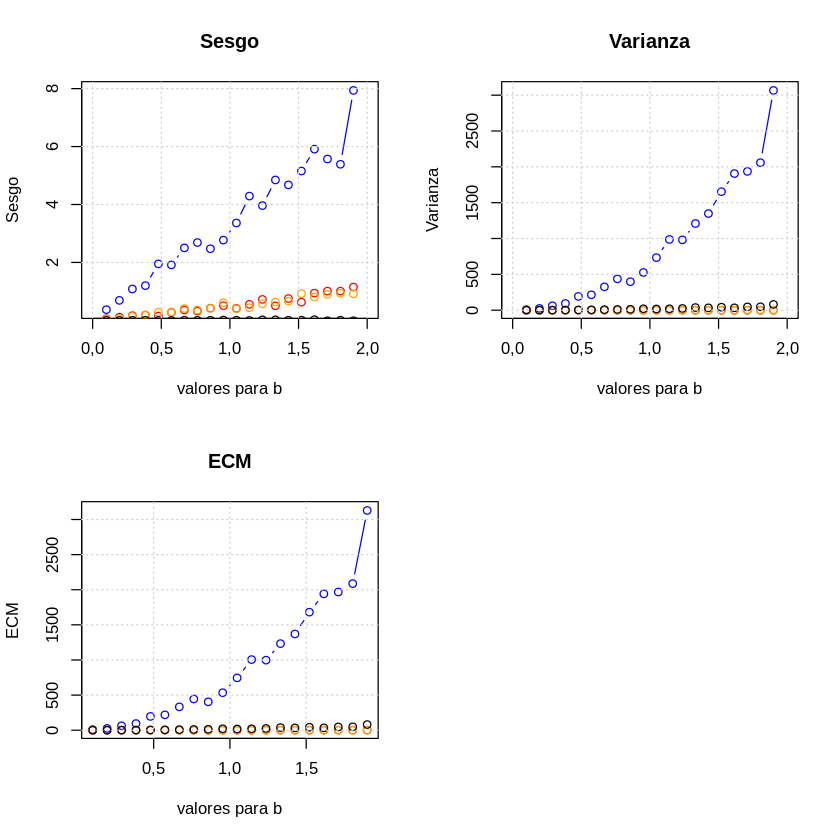

In [217]:
par(mfrow=c(2,2))
# Sesgos
plot(b_values, results_mv[,1], xlim=c(0,2),
     col="blue", main="Sesgo", xlab="valores para b", ylab="Sesgo", type="b")
points(b_values, results_mom[,1], col="red", type="b")
points(b_values, results_mom2[,1], col="orange", type="b")
points(b_values, results_med[,1], col="black", type="b")
grid()
# Varianzas
plot(b_values, results_mv[,2], xlim=c(0,2),
     col="blue", main="Varianza", xlab="valores para b", ylab="Varianza", type="b")
points(b_values, results_mom[,2], col="red", type="b")
points(b_values, results_mom2[,2], col="orange", type="b")
points(b_values, results_med[,2], col="black", type="b")
grid()
# ECM = Var^2 + Sesgo^2
plot(b_values, results_mv[,3], col="blue", main="ECM", xlab="valores para b", ylab="ECM", type="b")
points(b_values, results_mom[,3], col="red", type="b")
points(b_values, results_mom2[,3], col="orange", type="b")
points(b_values, results_med[,3], col="black", type="b")
grid()

#### c) Qué estimador prefiero?

Lo contesto cuando vea si no hay errores al calcular varianza